# `01` LSTM

- Design your LSTM learning model to classify hand-written digits (MNIST dataset).
- To handle images as a sequence, the LSTM input can be seen as a 28 sequences
of 28 elements each (taking each row of pixels as a single time step input).
- Then, you can use dense layer(s) on top (connected to the
output of the LSTM).
- Important Notes:
  - Image Size: $28\times28$
  - Use $80\%$ of the provided training data for training and $20\%$ for validation (Keep the test data for testing after training).
  - Use $32$ units in the LSTM layer and $15\%$ recurrent dropout.
  - Use Categorical Cross Entropy for the loss calculation, `Adam` for optimization and `accuracy` for metrics.


  **Additional Requirements**:
  - Try adding a second LSTM layer before the dense layer(s).
  - Change the number of cells to $48, 96, 256$ and report the accuracy curve.

## `+` Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GlobalAvgPool1D, ConvLSTM1D, Reshape, Flatten

# `+` Seed Value

In [2]:
SEED = 907

## `+` Load & Preprocess MNIST Dataset

**Reminder:** You might need rescaling, and/or other preprocessing methods.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## `+` Set Global Parameters

In [5]:
BATCH_SIZE  = 64
EPOCHS      = 10

## `i` Model Design

In [6]:
model = Sequential()
model.add(LSTM(32, recurrent_dropout=0.15, input_shape=(28, 28)))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,138 (31.79 KB)

 Trainable params: 8,138 (31.79 KB)

 Non-trainable params: 0 (0.00 B)

## `ii` Model Compilation & Training

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step - accuracy: 0.4728 - loss: 1.5529 - val_accuracy: 0.8723 - val_loss: 0.4284
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.8378 - loss: 0.5198 - val_accuracy: 0.9257 - val_loss: 0.2513
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.8972 - loss: 0.3371 - val_accuracy: 0.9448 - val_loss: 0.1887
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.9164 - loss: 0.2743 - val_accuracy: 0.9495 - val_loss: 0.1695
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9320 - loss: 0.2230 - val_accuracy: 0.9616 - val_loss: 0.1318
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9394 - loss: 0.2008 - val_accuracy: 0.9652 - val_loss: 0.1221
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 41ms/step - accuracy: 0.9487 - loss: 0.1733 - val_accuracy: 0.9672 - val_loss: 0.1141
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.9513 - loss: 0.1622 - 

## `iii` Model Evaluation

In [9]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [10]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9763 - loss: 0.0827
Accuracy for training: 97.47
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9674 - loss: 0.1067
Accuracy for testing: 97.15


## `iv` Result Visualization

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

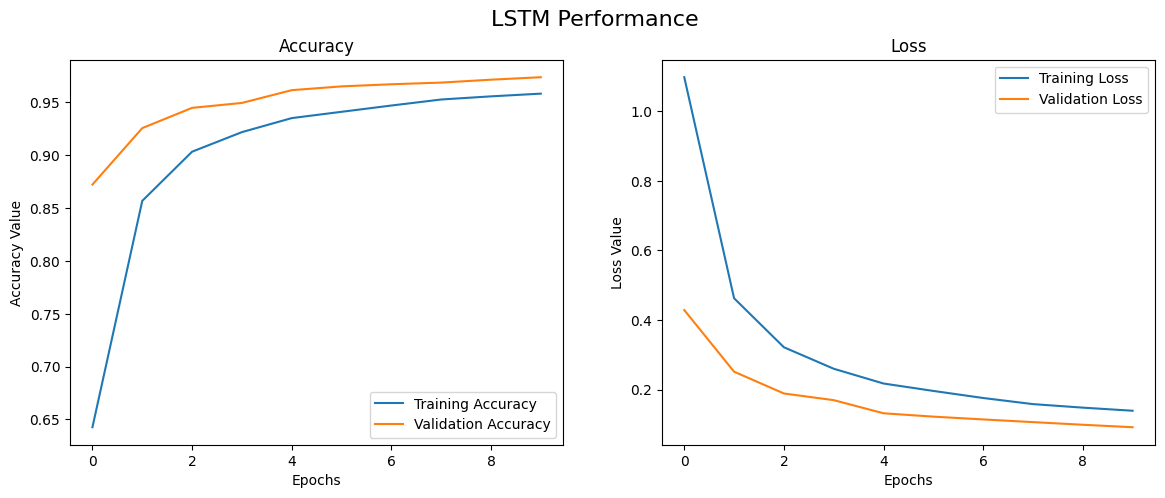

In [12]:
# Plot the training and validation accuracy and loss

fig = plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.legend()


# Loss plot
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

fig.suptitle('LSTM Performance', fontsize=16)

plt.show()


## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


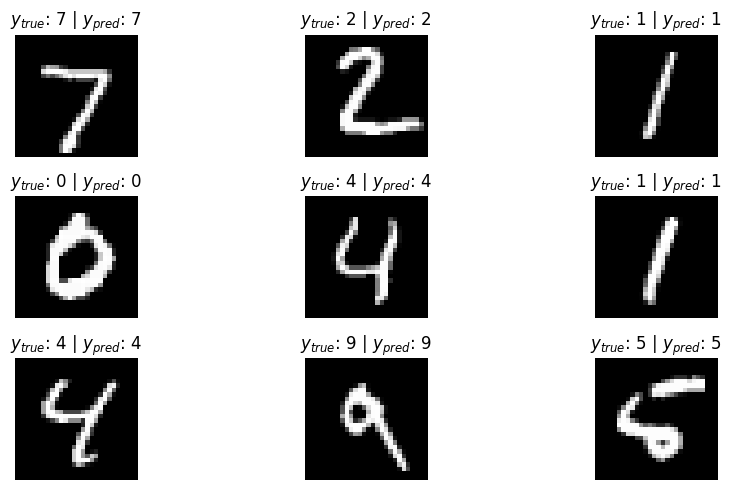

In [13]:
# Plot the Input, True Label, and Predicted Label

num_samples = 9
predictions = model.predict(x_test[:num_samples])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:num_samples], axis=1)

plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"$y_{{true}}$: {true_classes[i]} | $y_{{pred}}$: {predicted_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**Note:** You can add more trials and explore different hyperparameters and design decisions as you want.

## Trial 2

## Model Design

In [14]:
model = Sequential()
model.add(LSTM(96, recurrent_dropout=0.15, return_sequences=True, input_shape=(28, 28)))
model.add(LSTM(96, recurrent_dropout=0.15))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 28, 96)         │        48,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 96)             │        74,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,082 (480.79 KB)

 Trainable params: 123,082 (480.79 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [16]:
history2 = model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 69s 86ms/step - accuracy: 0.6857 - loss: 0.9293 - val_accuracy: 0.9519 - val_loss: 0.1510
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.9501 - loss: 0.1675 - val_accuracy: 0.9738 - val_loss: 0.0881
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 84ms/step - accuracy: 0.9671 - loss: 0.1045 - val_accuracy: 0.9770 - val_loss: 0.0703
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 87s 91ms/step - accuracy: 0.9759 - loss: 0.0805 - val_accuracy: 0.9825 - val_loss: 0.0587
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.9816 - loss: 0.0629 - val_accuracy: 0.9807 - val_loss: 0.0621
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 77s 85ms/step - accuracy: 0.9845 - loss: 0.0533 - val_accuracy: 0.9865 - val_loss: 0.0464
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 68s 91ms/step - accuracy: 0.9863 - loss: 0.0447 - val_accuracy: 0.9864 - val_loss: 0.0457
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.9864 - loss: 0.0420 - 

## Model Evaluation

In [17]:
history2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [18]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9956 - loss: 0.0142
Accuracy for training: 99.44
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9866 - loss: 0.0356
Accuracy for testing: 98.93


## Result Visualization

In [19]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

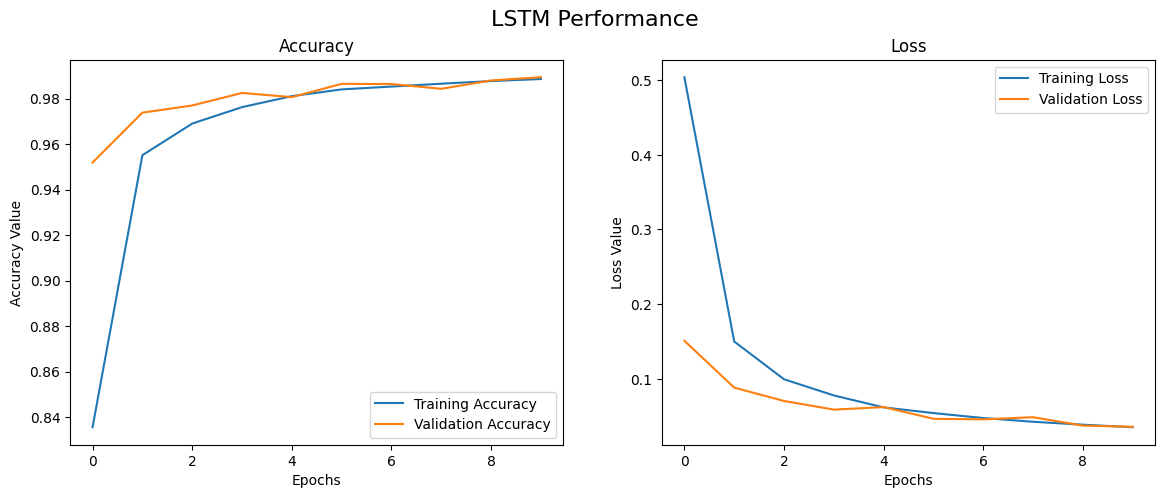

In [20]:
# Plot the training and validation accuracy and loss

fig = plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.legend()


# Loss plot
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

fig.suptitle('LSTM Performance', fontsize=16)

plt.show()


## Let's Visualize Model Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


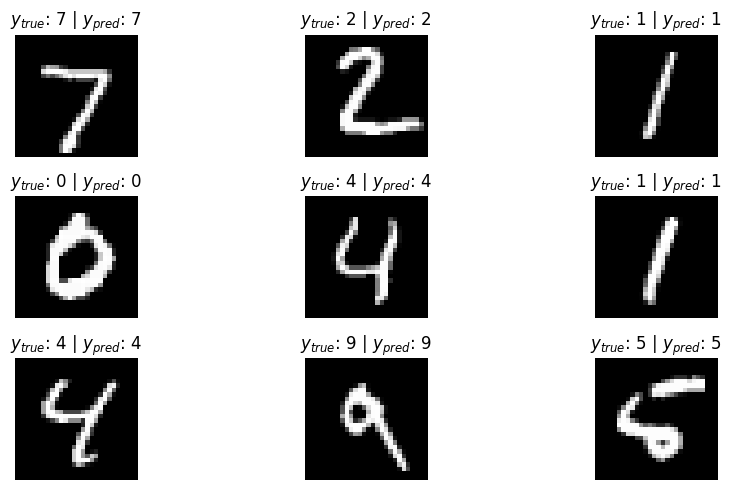

In [21]:
# Plot the Input, True Label, and Predicted Label

num_samples = 9
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"$y_{{true}}$: {true_classes[i]} | $y_{{pred}}$: {predicted_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

------------------------------

# ConvLSTM1D
- Repeat assignment `01` using `ConvLSTM1D` layer instead of `LSTM`: An LSTM utilizing the power of convolutions. Read more [here](https://paperswithcode.com/method/convlstm) and [here](https://medium.com/neuronio/an-introduction-to-convlstm-55c9025563a7).
- Use the same parameters from assignment `01` in addition to:
  - Kernel Size -> Try $1$ and $3$. Which is better?
  - Padding = `same` or `valid` -> Is there a big difference?

**Note:** You might need to reshape the input (Hint: check `keras.layers.Reshape` layer)


IMPORTANT NOTE: Make sure to organize your solution, add proper documentation, and report your insights.
------------------------------

## Model Design

In [22]:
model = Sequential()
model.add(Reshape((28, 28, 1), input_shape=(28, 28)))
model.add(ConvLSTM1D(filters=96, kernel_size=3, padding='same', recurrent_dropout=0.15, input_shape=(28, 28, 1)))
model.add(GlobalAvgPool1D())
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d (ConvLSTM1D)        │ (None, 28, 96)         │       112,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 96)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,098 (441.79 KB)

 Trainable params: 113,098 (441.79 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [24]:
history3 = model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2
)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.5344 - loss: 1.3756 - val_accuracy: 0.9127 - val_loss: 0.2994
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 41ms/step - accuracy: 0.9042 - loss: 0.3185 - val_accuracy: 0.9523 - val_loss: 0.1563
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9420 - loss: 0.1935 - val_accuracy: 0.9681 - val_loss: 0.1120
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9553 - loss: 0.1442 - val_accuracy: 0.9743 - val_loss: 0.0836
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9679 - loss: 0.1080 - val_accuracy: 0.9775 - val_loss: 0.0781
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.9707 - loss: 0.0978 - val_accuracy: 0.9812 - val_loss: 0.0632
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9755 - loss: 0.0773 - val_accuracy: 0.9810 - val_loss: 0.0656
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.9796 - loss: 0.0688 - 

## Model Evaluation

In [25]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Accuracy for training: {train_accuracy * 100:.2f}")

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy for testing: {test_accuracy * 100:.2f}")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9879 - loss: 0.0396
Accuracy for training: 98.69
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9795 - loss: 0.0612
Accuracy for testing: 98.36


## Result Visualization

In [26]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

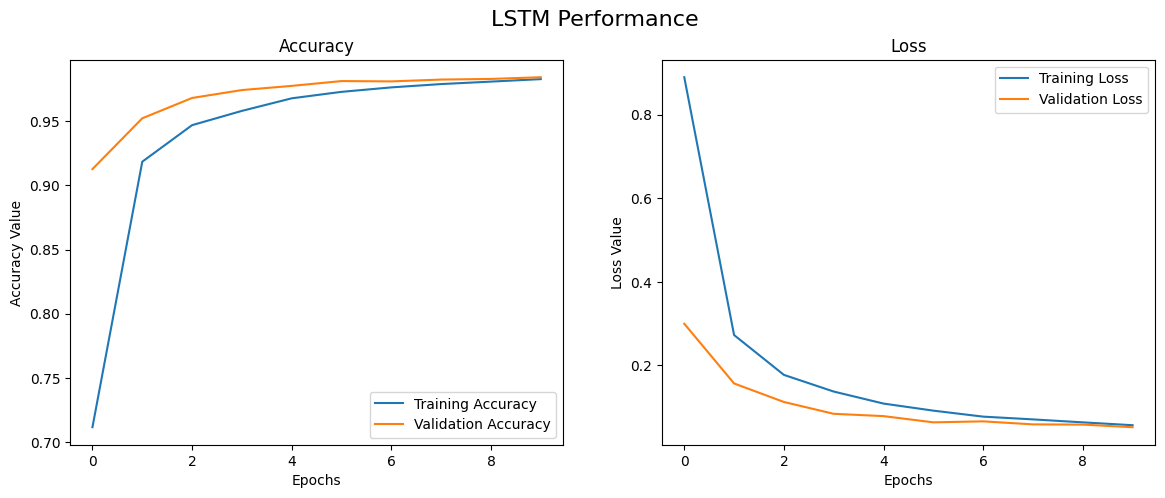

In [27]:
# Plot the training and validation accuracy and loss

fig = plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.legend()


# Loss plot
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

fig.suptitle('LSTM Performance', fontsize=16)

plt.show()


## Let's Visualize Model Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


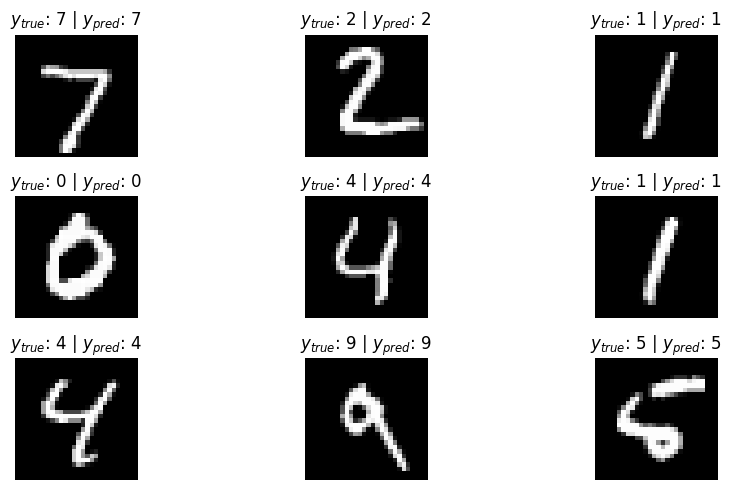

In [28]:
# Plot the Input, True Label, and Predicted Label

num_samples = 9
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"$y_{{true}}$: {true_classes[i]} | $y_{{pred}}$: {predicted_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
